# Table of Contents
<div class="lev1 toc-item"><a href="#Exercise-2.1.-Minimizing-a-quadratic-function-and-the-curse-of-dimensionality" data-toc-modified-id="Exercise-2.1.-Minimizing-a-quadratic-function-and-the-curse-of-dimensionality-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exercise 2.1. Minimizing a quadratic function and the curse of dimensionality</a></div><div class="lev1 toc-item"><a href="#Exercise-2.2.-Implementing-random-search-in-Python" data-toc-modified-id="Exercise-2.2.-Implementing-random-search-in-Python-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercise 2.2. Implementing random search in Python</a></div><div class="lev1 toc-item"><a href="#Exercise-2.3.-Using-random-search-to-minimize-a-nonconvex-function" data-toc-modified-id="Exercise-2.3.-Using-random-search-to-minimize-a-nonconvex-function-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercise 2.3. Using random search to minimize a nonconvex function</a></div><div class="lev1 toc-item"><a href="#Exercise-2.4.-Random-search-with-diminishing-steplength" data-toc-modified-id="Exercise-2.4.-Random-search-with-diminishing-steplength-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercise 2.4. Random search with diminishing steplength</a></div><div class="lev1 toc-item"><div class="lev1 toc-item"><a href="#Exercise-2.8.-Coordinate-search-applied-to-minimize-a-simple-quadratic" data-toc-modified-id="Exercise-2.8.-Coordinate-search-applied-to-minimize-a-simple-quadratic-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Exercise 2.8. Coordinate search applied to minimize a simple quadratic</a></div><div class="lev1 toc-item"><a href="#Exercise-2.9.-Coordinate-search-with-diminishing-steplength" data-toc-modified-id="Exercise-2.9.-Coordinate-search-with-diminishing-steplength-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Exercise 2.9. Coordinate search with diminishing steplength</a></div><div class="lev1 toc-item"></div>

In [37]:
# import basic libraries and autograd wrapped numpy
import autograd.numpy as np
import copy
import matplotlib.pyplot as plt


# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

# Exercise 2.1. Minimizing a quadratic function and the curse of dimensionality

In this experiment you will verify the *curse of dimensionality* issue associated with the use of randomly sampled points for naive evaluation for the simple quadratic function

$$
g(\mathbf{w}) = \mathbf{w}^T\mathbf{w}
$$

whose minimum is always $g(\mathbf{0}_{N\times 1}) = 0$ regardless of the input dimension $N$.

Here you need to create a range of these quadratics for input dimension $N=1$ to $N = 100$.  Below you will find a Python function defining such a quadratic for general input dimension $N$.

In [3]:
# a function defining a a simple, N dimensional quadratic function g(\mathbf{w}) = \mathbf{w}^T\mathbf{w}
def quadratic(x):
    return np.dot(x.T,x)

In [7]:
#my helper function to create empty arrays
def nans(shape, dtype=float):
    """ Returns array of NaNs with defined shape"""
    a = np.empty(shape, dtype)
    a.fill(np.nan)
    return a

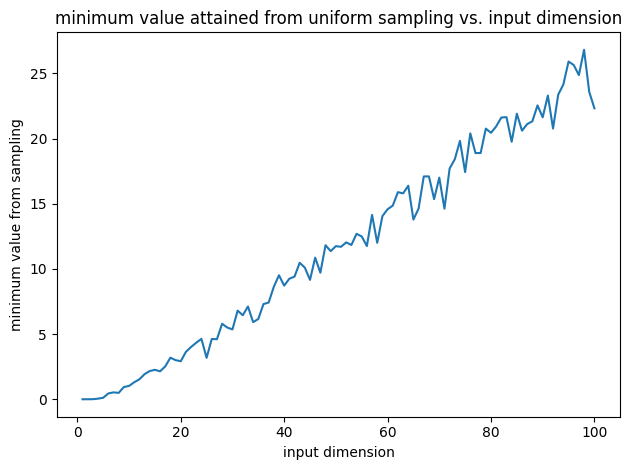

In [43]:
#(a)
dim_mins = nans(100)
for N in range(100): #for each input dimension
     temp_array = nans(100)
     for i in range(100):
          temp_array[i] = quadratic((2*np.random.rand(1,N)-1)[0]) #sample 100 times and evaluate
     dim_mins[N] = np.min(temp_array) #record minimum value
plt.plot(range(1,101),dim_mins)
plt.xlabel('input dimension')
plt.ylabel('minimum value from sampling')
plt.title('minimum value attained from uniform sampling vs. input dimension')
plt.show()

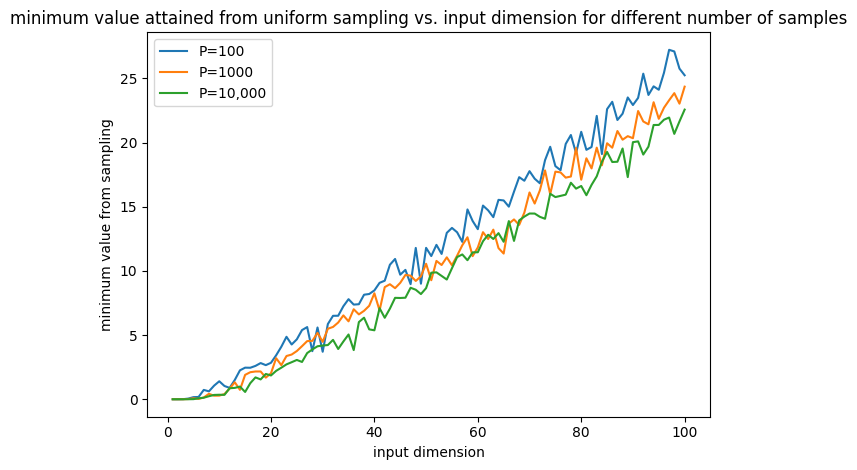

In [44]:
#(b) As the number of dimensions (N) increases, minimum value attained increases and diverges from origin for the curse of dimensionality. 
# Increasing the number of samples (P) can, to some extent, help find a more accurate minimum value but doesn't rescue us from the curse of dimensionality.
dim_mins_100 = nans(100)
dim_mins_1000 = nans(100)
dim_mins_10000 = nans(100)

for N in range(100): #for each input dimension
     temp_array = nans(100)
     for i in range(100):
          temp_array[i] = quadratic((2*np.random.rand(1,N)-1)[0]) #sample 100 times and evaluate
     dim_mins_100[N] = np.min(temp_array) #record minimum value

     temp_array = nans(1000)
     for i in range(1000):
          temp_array[i] = quadratic((2*np.random.rand(1,N)-1)[0]) #sample 1000 times and evaluate
     dim_mins_1000[N] = np.min(temp_array) #record minimum value

     temp_array = nans(10000)
     for i in range(10000):
          temp_array[i] = quadratic((2*np.random.rand(1,N)-1)[0]) #sample 10,000 times and evaluate
     dim_mins_10000[N] = np.min(temp_array) #record minimum value

plt.plot(range(1,101),dim_mins_100, label = 'P=100')
plt.plot(range(1,101),dim_mins_1000, label = 'P=1000')
plt.plot(range(1,101),dim_mins_10000, label = 'P=10,000')
plt.legend()
plt.xlabel('input dimension')
plt.ylabel('minimum value from sampling')
plt.title('minimum value attained from uniform sampling vs. input dimension for different number of samples')
plt.show()

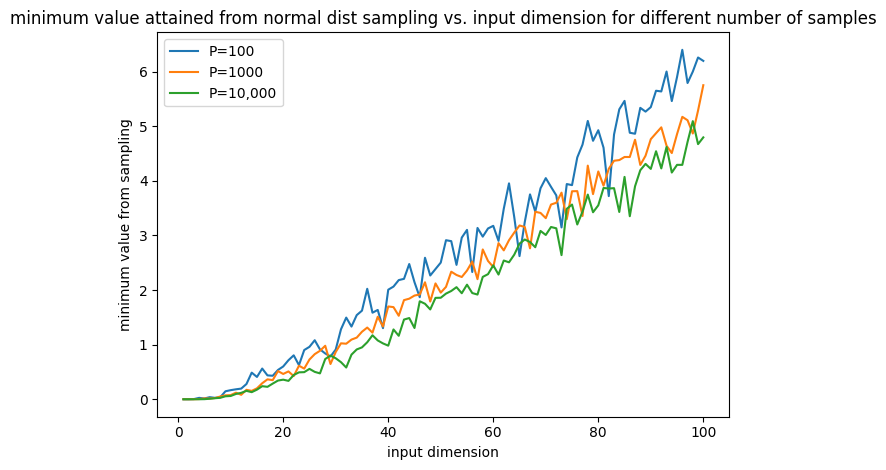

In [60]:
#(c) Sampling from a normal distribution with mean and stdev = 0, 0.3
#Although with such a distribution the probability to get minimum values is higher (with input around 0), the curse of dimensionlity remains
mu, sigma = 0, 0.3
dim_mins_100 = nans(100)
dim_mins_1000 = nans(100)
dim_mins_10000 = nans(100)

for N in range(100): #for each input dimension
     temp_array = nans(100)
     for i in range(100):
          temp_array[i] = quadratic(np.random.normal(mu,sigma,N)) #sample 100 times and evaluate
     dim_mins_100[N] = np.min(temp_array) #record minimum value

     temp_array = nans(1000)
     for i in range(1000):
          temp_array[i] = quadratic(np.random.normal(mu,sigma,N)) #sample 1000 times and evaluate
     dim_mins_1000[N] = np.min(temp_array) #record minimum value

     temp_array = nans(10000)
     for i in range(10000):
          temp_array[i] = quadratic(np.random.normal(mu,sigma,N)) #sample 10,000 times and evaluate
     dim_mins_10000[N] = np.min(temp_array) #record minimum value

plt.plot(range(1,101),dim_mins_100, label = 'P=100')
plt.plot(range(1,101),dim_mins_1000, label = 'P=1000')
plt.plot(range(1,101),dim_mins_10000, label = 'P=10,000')
plt.legend()
plt.xlabel('input dimension')
plt.ylabel('minimum value from sampling')
plt.title('minimum value attained from normal dist sampling vs. input dimension for different number of samples')
plt.show()

# Exercise 2.4. Random search with diminishing steplength

Use the random search algorithm to minimize a famous optimization test function called the *Rosenbrock function* which takes the form

\begin{equation}
g\left(w_0,w_1\right) = 100\left(w_1 - w_0^2\right)^2 + \left(w_0 - 1\right)^2.
\end{equation}

This function (whose contour plot is shown in the text) has a global minimum at the point $\mathbf{w}^{\star} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$ located in a very narrow and curved valley.

Now we make the same run but use the diminishing steplength rule $\alpha = \frac{1}{k}$. 

In [208]:
# random search function
def random_search(g,alpha,max_its,w,num_samples):
    # run random search
    weight_history = []         # container for weight history
    cost_history = []           # container for corresponding cost function history
    for k in range(1,max_its+1):                    
        if alpha == 'diminish':
            a = 1/k
        else:
            a = alpha
        # record weights and cost evaluation
        weight_history.append(w)
        cost_history.append(g(w))
        
        # construct set of random unit directions
        ##  TO DO 
        N = np.size(w)
        unit_directions = nans([num_samples,N])
        for i in range(num_samples):
            dir = np.random.randn(N)
            unit_directions[i,:] = dir/np.sqrt(np.sum(dir*dir))
        
        ### pick best descent direction
        ## TO DO
        w_candidates = nans([num_samples,N])
        i = 0
        for d in unit_directions:
            w_candidates[i,:] = w + a*d
            i+=1
        
        # evaluate all candidates
        evals = np.array([g(w_val) for w_val in w_candidates])

        # check directions to ensure a real descent direction to take the step in its direction
        ## TO DO
        if g(w_candidates[np.argmin(evals)]) < g(w):
            d = unit_directions[np.argmin(evals)]
            w = w + a*d
        else:
            return weight_history,cost_history
        
    # record weights and cost evaluation
    weight_history.append(w)
    cost_history.append(g(w))
    return weight_history,cost_history

Cost of the last step in the first run: 0.03003669461481122
Cost of the last step in the second run: 7.947453545491582e-06


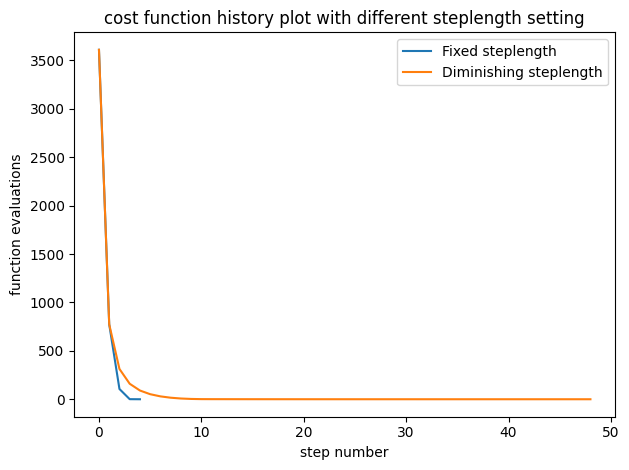

In [220]:
# In the first run, only 4 steps were taken before random search cannot further diminish the cost, because the setp length
# was too large. However in the second run, random search can run to the maximum iterations with diminishing steplength. 
# By definition of the function, the cost has kept diminishing with diminishing steplength. 
# Although fixed step length can also help find a good set of weights, diminishing steplength can find a set of weights closer to optimality.

# I printed the last step's cost in two runs, and the cost in the second run is smaller than that in the first run in orders.

g = lambda w: 100*(w[1]-w[0]**2)**2 + (w[0]-1)**2 

# first run with fixed steplength alpha = 1
alpha = 1
max_its = 50
w = [-2, -2]
num_samples = 1000
weight_history,cost_history = random_search(g, alpha, max_its, w, num_samples)
print('Cost of the last step in the first run:',cost_history[-1])

plt.plot(range(np.size(cost_history)),cost_history,label = 'Fixed steplength')
plt.xlabel('step number')
plt.ylabel('function evaluations')

# second run with diminishing steplength
alpha = 'diminish'
max_its = 50
w = [-2, -2]
num_samples = 1000
weight_history,cost_history = random_search(g, alpha, max_its, w, num_samples)
print('Cost of the last step in the second run:',cost_history[-1])

plt.plot(range(np.size(cost_history)),cost_history,label = 'Diminishing steplength')
plt.xlabel('step number')
plt.ylabel('function evaluations')
plt.title('cost function history plot with different steplength setting')
plt.legend()
plt.show()

# Exercise 2.5. Random descent probabilities

In [223]:
#(a) We start from w0 which is at the green dot in the figure. 
# (supposing the circles are all with radius = 1) With fixed step length of 1, our next step can be any point on the black circle. 
# However, the red dot represents the true global minimum, so only if our descent direction is toward the solid curve of the black circle, 
# we are choosing a descent direction such that g(w0 + alpha*d0) < g(w0). 
# The probability that this will happen for a randomly chosen unit direction would thus be
# (length of the solid curve) / (circumference of the black circle). 

# Circumference of the black circle = 2*pi
# Length of the solid curve is smaller than 1/2 of the circumference of the blue circle, so,
# Length of the solid curve < 1/2 * 2*pi*sqrt(3)/2 = 2*pi * sqrt(3)/4
# Thus, P(descent) < 2*pi*sqrt(3)/4 / 2*pi = sqrt(3)/4. sqrt(3)/4 upper-bounds the probability.

In [225]:
#(b) The argument in (a) naturally follows for higher dimensions, except that the length is now surface on n-sphere. 

# For 2D,
# P(descent) < 1/2 * (length of the circle with radius of sqrt(3)/2) / (length of the circle with radius of 1)
# P(descent) < 1/2 * (sqrt(3)/2)^1
# For 3D,
# P(descent) < 1/2 * (surface of the sphere with radius of sqrt(3)/2) / (length of the sphere with radius of 1)
# P(descent) < 1/2 * 4*pi*(sqrt(3)/2)^2 / 4*pi
# P(descent) < 1/2 * (sqrt(3)/2)^2
# For higher dimensions,
# P(descent) < 1/2 * (surface of the n-sphere with radius of sqrt(3)/2) / (surface of the n-sphere with radius of 1)
# P(descent) < 1/2 * (sqrt(3)/2)^(n-1) 
# This would be the formula for an upper-bound on the probability of descent for general N.


# Exercise 2.8. Coordinate search applied to minimize a simple quadratic

Below we provide a skeleton wrapper for coordinate search algorithm.  All parts marked "TO DO" are for you to construct.

In [226]:
# zero order coordinate search
def coordinate_search(g,alpha,max_its,w):
    # construct set of all coordinate directions
    directions_plus = np.eye(np.size(w),np.size(w))
    directions_minus = - np.eye(np.size(w),np.size(w))
    directions = np.concatenate((directions_plus,directions_minus),axis=0)
        
    # run coordinate search
    weight_history = []         # container for weight history
    cost_history = []           # container for corresponding cost function history
    for k in range(1,max_its+1):                    
        # record weights and cost evaluation
        weight_history.append(w)
        cost_history.append(g(w))
        
        ### pick best descent direction
        # compute all new candidate points
        ## TO DO
        w_candidates = w + alpha*directions
        
        # evaluate all candidates
        ## TO DO
        evals = np.array([g(w_val) for w_val in w_candidates])

        # if we find a real descent direction take the step in its direction
         ## TO DO 
        if g(w_candidates[np.argmin(evals)]) < g(w):
            d = directions[np.argmin(evals)]
            w = w + alpha*d
        else:
            return weight_history,cost_history
            
    # record weights and cost evaluation
    weight_history.append(w)
    cost_history.append(g(w))
    return weight_history,cost_history

Now compare 5 steps of the random search algorithm (with $P = 1000$ random directions tested at each step) to 7 steps of coordinate search, using the same starting point $\mathbf{w}^0 = \begin{bmatrix}3 \\ 4\end{bmatrix}$ and fixed steplength parameter value $\alpha = 1$ for both.  

The test function in this case is the simple quadratic used in several of the examples of the previous Section

\begin{equation}
g(w_0,w_1) = w_0^2 + w_1^2 + 2.
\end{equation}

Cost of the last step in random search run: 2.0000104383683137
Cost of the last step in coordinate search run: 2.0


Text(0.5, 1.0, 'cost function history plot with random vs. coordinate search')

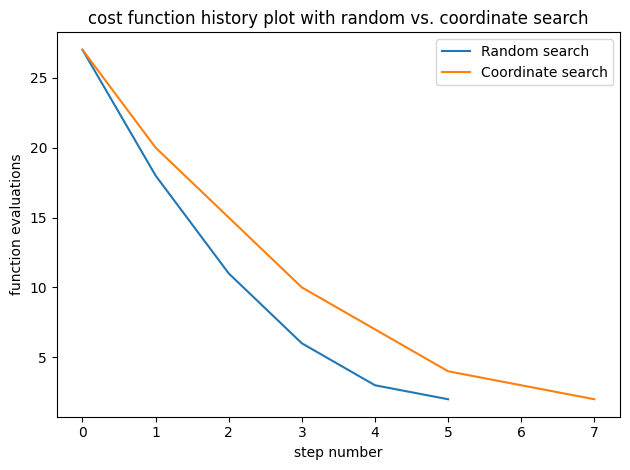

In [228]:
# By plotting the resulting runs of both algorithms, it's obvious that random search and coordinate can both find the minimum
# of this quadratic (which is when w0=w1=0, g(w0,w1)=2), however, it only takes random search 5 steps in doing so,
# but 7 steps need to be taken in coordinate search.
# It kind of makes sense because coordinate search are only searching in 2N = 4 directions in each step and descend, whereas random search
# looks for more directions and descend more quickly. 

# My general takeaway is that random search suffices in this particular example when N = 2,
# but as we discussed, coordinate search would be more scalable if our cost function becomes higher dimensional.

# define the test function
g = lambda w: w[0]**2 + w[1]**2 + 2

# run random search
alpha = 1
max_its = 5
w = [3, 4]
num_samples = 1000
weight_history,cost_history = random_search(g, alpha, max_its, w, num_samples)
print('Cost of the last step in random search run:',cost_history[-1])
plt.plot(range(np.size(cost_history)),cost_history,label = 'Random search')
plt.xlabel('step number')
plt.ylabel('function evaluations')

# run coordinate search
alpha = 1
max_its = 7
w = [3, 4]
weight_history,cost_history = coordinate_search(g,alpha,max_its,w)
print('Cost of the last step in coordinate search run:',cost_history[-1])
plt.plot(range(np.size(cost_history)),cost_history,label = 'Coordinate search')
plt.xlabel('step number')
plt.ylabel('function evaluations')
plt.legend()
plt.title('cost function history plot with random vs. coordinate search')

